In [1]:
import pandas as pd


In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [3]:
Comm_Resource=pd.read_csv('../data/Community_Resource_Information.csv')

In [4]:
Comm_Resource.head(10)

,Contact Type,Contact,Street Address,Phone Number,Notes,Mapped location
0,GED/Education,Christian Women's Job Corp,18 8th Ave. S,(615) 244-3669,women only,NaN
1,Clothing,Samaritan Ministries,1041 28th Ave N,(615) 329-1523,Mon - Sat 11:00 am - 12 Noon,"1041 28th Ave N\nNashville, TN\n(36.167155, -8..."
2,Legal Assistance,Morning Star Clarksville Court Advocate,NaN,NaN,JCAC Adv. will E-mail Heather Goodmancave at h...,"Nashville, TN\n(36.166687, -86.779932)"
3,Crisis Info Resources,FBI - Memphis Division,"225 N. Humphreys Blvd., Suite 3000",(901)747-4300,NaN,NaN
4,Counseling,Agape Counseling Services,4555 Trousdale,(615) 781-3000,NaN,"4555 Trousdale\nNashville, TN\n(36.08604, -86...."
5,Rent/Mortgage/Utility Help,Jewish Family Services,"801 Percy Warner Blvd., Suite 103",(615) 354-1644,Jewish families only,"801 Percy Warner Blvd., Suite 103\nNashville, ..."
6,Job Training,Against the Grain,"1441 New Highway 96 W, Suite 9",(615) 791-7885,NaN,"1441 New Highway 96 W, Suite 9\nFranklin, TN\n..."
7,Job Training,Salvation Army,631 Dickerson Rd.,(615) 242-0411,NaN,NaN
8,GED/Education,Citizens for Affordable Housing,295 Plus Park Blvd.,(615) 361-9101,home-buying education,"295 Plus Park Blvd.\nNashville, TN\n(36.127161..."
9,Students,Title IX @ Vanderbilt - Anita Jenious,Baker Building Suite 975,(615) 322-4705,Vanderbilt students,NaN


In [5]:
Comm_Resource.tail(10)

,Contact Type,Contact,Street Address,Phone Number,Notes,Mapped location
538,Immigrant/Refugee,Adult Literacy Council,NaN,(615) 298-8060,NaN,"Nashville, TN\n(36.166687, -86.779932)"
539,Transportation Services,TennCare transportation,NaN,(615) 333-5445,NaN,"Nashville, TN\n(36.166687, -86.779932)"
540,Food,Preston Taylor Ministries,4014 Indiana Ave,(615) 596-4386,community food bank-pantry,"4014 Indiana Ave\nNashville, TN\n(36.157154, -..."
541,Senior/Disabled Housing,Hadley Park Towers,2901 John Merritt Blvd.,(615) 252-3724,housing,"2901 John Merritt Blvd.\nNashville, TN\n(36.16..."
542,Food,Second Harvest BackPack Program,NaN,(615) 329-3491,weekend food for kids,"Nashville, TN\n(36.166687, -86.779932)"
543,Senior/Disabled Housing,Metropolitan Development and Housing Agency (M...,701 S. 6th St.,(615) 252-8400,housing,"701 S. 6th St.\nNashville, TN\n(36.165754, -86..."
544,Rehab - Drug/Alcohol,Al-Anon Family Service,"176 Thompson Ln., Suite G3",(615) 333-6066,for relatives/friends of alcoholics,"176 Thompson Ln., Suite G3\nNashville, TN\n(36..."
545,Legal Assistance,Fifty Forward,108 Donelson Pike,(615) 883-8375,age 50+; this number is for the Donelson Stati...,"108 Donelson Pike\nNashville, TN\n(36.166615, ..."
546,Food,Una Church of Christ,1917 Old Murfreesboro Pike,(615) 361-8920,emergency food assistance,"1917 Old Murfreesboro Pike\nNashville, TN\n(36..."
547,Counseling,Al-Anon Family Service,"176 Thompson Ln., Suite G3",(615) 333-6066,for relatives/friends of alcoholics,"176 Thompson Ln., Suite G3\nNashville, TN\n(36..."


In [6]:
Comm_Resource.describe()

,Contact Type,Contact,Street Address,Phone Number,Notes,Mapped location
count,548,548,421,538,318,495
unique,28,435,305,394,207,271
top,Food,Room in the Inn,639 Lafayette St.,(615) 244-3669,community food bank-pantry,"Nashville, TN\n(36.166687, -86.779932)"
freq,72,6,8,8,29,125


In [7]:

Comm_Resource.shape


(548, 6)

In [8]:
Comm_Resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Contact Type     548 non-null    object
 1   Contact          548 non-null    object
 2   Street Address   421 non-null    object
 3   Phone Number     538 non-null    object
 4   Notes            318 non-null    object
 5   Mapped location  495 non-null    object
dtypes: object(6)
memory usage: 25.8+ KB


In [9]:
Comm_Resource.isnull().sum()

Contact Type         0
Contact              0
Street Address     127
Phone Number        10
Notes              230
Mapped location     53
dtype: int64

In [10]:
Comm_Resource.Contact.nunique

<bound method IndexOpsMixin.nunique of 0                             Christian Women's Job Corp
1                                   Samaritan Ministries
2                Morning Star Clarksville Court Advocate
3                                 FBI - Memphis Division
4                              Agape Counseling Services
                             ...                        
543    Metropolitan Development and Housing Agency (M...
544                               Al-Anon Family Service
545                                        Fifty Forward
546                                 Una Church of Christ
547                               Al-Anon Family Service
Name: Contact, Length: 548, dtype: object>

In [11]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [12]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             56 non-null     object  
 1   objectid        56 non-null     object  
 2   po_name         56 non-null     object  
 3   shape_stlength  56 non-null     object  
 4   shape_starea    56 non-null     object  
 5   geometry        56 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


In [13]:
zipcodes.shape

(56, 6)

In [14]:
food_locations=Comm_Resource.loc[Comm_Resource['Contact Type']=='Food']

In [15]:
food_locations.head()

,Contact Type,Contact,Street Address,Phone Number,Notes,Mapped location
11,Food,Welcome Home ministries,P.O. Box 100183,(615) 309-7087,community food bank-pantry,NaN
17,Food,Bordeaux Advocates,1414 County Hospital Rd,(615) 862-6953,Kids Food Bank and Meals,"1414 County Hospital Rd\nNashville, TN\n(36.18..."
20,Food,Salvation Army,631 Dickerson Rd.,(615) 242-0411,NaN,NaN
31,Food,Martha O'Bryan Center,711 S. 7th St.,(615) 760-4064,emergency food assistance,"711 S. 7th St.\nNashville, TN\n(36.166867, -86..."
43,Food,Boys and Girls Club/Preston Taylor,915 38th Ave North,(615) 341-0101,community food bank-pantry,"915 38th Ave North\nNashville, TN\n(36.159449,..."


In [16]:
Comm_Resource.groupby("Contact Type").count()

,Contact,Street Address,Phone Number,Notes,Mapped location
Contact Type,,,,,
Childcare,6,5,6,3,6
Children's Services,53,40,51,26,50
Christmas,5,5,4,5,4
Clothing,19,17,19,14,14
Counseling,36,29,35,20,31
Crisis Info Resources,24,12,24,8,21
Disability,1,0,1,1,1
ESL Classes,23,21,23,5,18
Food,72,70,72,65,66


In [17]:
Job_Training=Comm_Resource.loc[Comm_Resource['Contact Type']=='Job Training']

In [18]:
Job_Training.head()

,Contact Type,Contact,Street Address,Phone Number,Notes,Mapped location
6,Job Training,Against the Grain,"1441 New Highway 96 W, Suite 9",(615) 791-7885,NaN,"1441 New Highway 96 W, Suite 9\nFranklin, TN\n..."
7,Job Training,Salvation Army,631 Dickerson Rd.,(615) 242-0411,NaN,NaN
15,Job Training,How's Nashville,NaN,(615) 880-2360,NaN,"Nashville, TN\n(36.166687, -86.779932)"
40,Job Training,Goodwill Industries - Spanish-speakers,NaN,NaN,contact Mark Kelly mark.kelly@givegw.org,"Nashville, TN\n(36.166687, -86.779932)"
64,Job Training,Christian Women's Job Corp,420 Main St.,(615) 244-3669,women only,"420 Main St.\nNashville, TN\n(36.172758, -86.7..."


In [19]:
Job_Training.shape


(28, 6)

In [20]:
food_locations.shape


(72, 6)

In [21]:
Comm_Resource.groupby("Mapped location").count()

,Contact Type,Contact,Street Address,Phone Number,Notes
Mapped location,,,,,
"1 University Park Dr.\nNashville, TN\n(36.105624, -86.800012)",1,1,1,1,1
"100 James Robertson Parkway, Suite 100\nNashville, TN\n(36.167948, -86.777955)",1,1,1,1,1
"100 Vine Ct.\nNashville, TN\n(36.12972, -86.83954)",1,1,1,1,0
"100 White Bridge Rd.\nNashville, TN\n(36.130872, -86.856743)",1,1,1,1,0
"1000 2nd Ave. N.\nNashville, TN\n(36.174455, -86.783049)",5,5,5,5,0
...,...,...,...,...,...
"941 16th Ave\nNashville, TN\n(36.166215, -86.800706)",1,1,1,1,1
"948 Woodland St.\nNashville, TN\n(36.176419, -86.752782)",1,1,1,1,0
"999 Girl Scout Rd.\nBurns, TN\n(36.049384, -87.268619)",1,1,1,1,0


In [22]:
food_locations = food_locations.dropna()

In [23]:
c = 0
l = []
for (columnName, columnData) in food_locations.iteritems():
    if columnName == 'Mapped location':
        for i in columnData:
            j = i[i.find('('):]
            #j = j.replace(',','')
            l.append(tuple(j.split(',')))
            print(j)
#food_locations["LatLong"] = l
print(l)

(36.182754, -86.848828)
(36.166867, -86.756502)
(36.159449, -86.830883)
(36.141807, -86.782879)
(36.144431, -86.786513)
(36.174019, -86.793102)
(36.21823, -86.83935)
(36.071058, -86.934079)
(36.199977, -86.768125)
(36.170535, -86.823556)
(36.162212, -86.800477)
(36.151929, -86.849518)
(36.167155, -86.820595)
(36.183622, -86.815798)
(36.267485, -86.699242)
(36.166135, -86.806327)
(36.21842, -86.728049)
(36.091451, -86.887776)
(36.174575, -86.795251)
(36.108443, -86.743919)
(36.166215, -86.800706)
(36.154963, -86.81334)
(36.113416, -86.690175)
(36.177004, -86.78399)
(36.056908, -86.672419)
(36.160212, -86.794888)
(36.05738, -86.722669)
(36.198027, -86.840081)
(36.193787, -86.834873)
(36.1918, -86.832948)
(36.182693, -86.770226)
(36.157646, -86.807185)
(36.057939, -86.741783)
(36.257839, -86.647788)
(36.194127, -86.769295)
(36.198194, -86.794385)
(36.165187, -86.855605)
(36.15078, -86.756855)
(36.159057, -86.876345)
(36.19983, -86.809691)
(36.180202, -86.814092)
(36.220032, -86.836934)
(3

In [24]:
food_locations.head(20)

,Contact Type,Contact,Street Address,Phone Number,Notes,Mapped location
17,Food,Bordeaux Advocates,1414 County Hospital Rd,(615) 862-6953,Kids Food Bank and Meals,"1414 County Hospital Rd\nNashville, TN\n(36.18..."
31,Food,Martha O'Bryan Center,711 S. 7th St.,(615) 760-4064,emergency food assistance,"711 S. 7th St.\nNashville, TN\n(36.166867, -86..."
43,Food,Boys and Girls Club/Preston Taylor,915 38th Ave North,(615) 341-0101,community food bank-pantry,"915 38th Ave North\nNashville, TN\n(36.159449,..."
45,Food,Edgehill Center,935 Edgehill Ave,(615) 256-5108,"emergency food assistance, community food bank","935 Edgehill Ave\nNashville, TN\n(36.141807, -..."
66,Food,Kayne Avenue Baptist Church,1025 12th Ave. S.,(615) 255-5528,emergency food assistance,"1025 12th Ave. S.\nNashville, TN\n(36.144431, ..."
70,Food,Fifteenth Ave. Baptist Church,1203 9th Ave,(615) 256-4326,soup kitchen,"1203 9th Ave\nNashville, TN\n(36.174019, -86.7..."
79,Food,Temple Baptist Church,3720 Kings Ln.,(615) 876-4084,emergency food assistance,"3720 Kings Ln.\nNashville, TN\n(36.21823, -86...."
87,Food,Project for Neighborhood Aftercare Bellevue,655 Colice-Jean Rd,(615) 662-3000,community food bank-pantry,"655 Colice-Jean Rd\nBellview, TN 37221\n(36.07..."
95,Food,New Life Seventh Day Adventist Church,208 Gatewood Ave,(615) 228-7505,emergency food assistance,"208 Gatewood Ave\nNashville, TN\n(36.199977, -..."
110,Food,Schrader Lane Church of Christ,1234 Schrader Lane,(615) 329-9830,community food bank-pantry,"1234 Schrader Lane\nNashville, TN\n(36.170535,..."


In [25]:
geometry = [Point(float(l[i][0][1:]),float(l[i][1][:-1])) for i in range(len(l))]

In [26]:
print(geometry[0].x)

36.182754


In [27]:
crs = {'init': 'epsg:4326'}

In [28]:
gdf = gpd.GeoDataFrame(food_locations, crs=crs, geometry=geometry)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(36.182754, -86.848828)
(36.166867, -86.756502)
(36.159449, -86.830883)
(36.141807, -86.782879)
(36.144431, -86.786513)
(36.174019, -86.793102)
(36.21823, -86.83935)
(36.071058, -86.934079)
(36.199977, -86.768125)
(36.170535, -86.823556)
(36.162212, -86.800477)
(36.151929, -86.849518)
(36.167155, -86.820595)
(36.183622, -86.815798)
(36.267485, -86.699242)
(36.166135, -86.806327)
(36.21842, -86.728049)
(36.091451, -86.887776)
(36.174575, -86.795251)
(36.108443, -86.743919)
(36.166215, -86.800706)
(36.154963, -86.81334)
(36.113416, -86.690175)
(36.177004, -86.78399)
(36.056908, -86.672419)
(36.160212, -86.794888)
(36.05738, -86.722669)
(36.198027, -86.840081)
(36.193787, -86.834873)
(36.1918, -86.832948)
(36.182693, -86.770226)
(36.157646, -86.807185)
(36.057939, -86.741783)
(36.257839, -86.647788)
(36.194127, -86.769295)
(36.198194, -86.794385)
(36.165187, -86.855605)
(36.15078, -86.756855)
(36.159057, -86.876345)
(36.19983, -86.809691)
(36.180202, -86.814092)
(36.220032, -86.836934)
(3

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

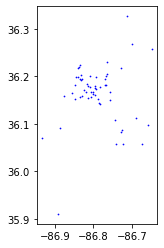

In [29]:

Comm_Resource= pd.read_csv('../data/Community_Resource_Information.csv')
food_locations=Comm_Resource.loc[Comm_Resource['Contact Type']=='Food']
food_locations = food_locations.dropna()
c = 0
l = []
for (columnName, columnData) in food_locations.iteritems():
    if columnName == 'Mapped location':
        for i in columnData:
            j = i[i.find('('):]
            #j = j.replace(',','')
            l.append(list(j.split(', ')))
            print(j)
#food_locations["LatLong"] = l

geometry = [Point(float(i[1].strip()[:-1]),float(i[0].strip()[1:])) for i in l]
print(geometry[0].x)
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(food_locations, crs=crs, geometry=geometry)

gdf.plot(marker='o', color='b', markersize=0.5)


In [30]:

gdf

,Contact Type,Contact,Street Address,Phone Number,Notes,Mapped location,geometry
17,Food,Bordeaux Advocates,1414 County Hospital Rd,(615) 862-6953,Kids Food Bank and Meals,"1414 County Hospital Rd\nNashville, TN\n(36.18...",POINT (-86.84883 36.18275)
31,Food,Martha O'Bryan Center,711 S. 7th St.,(615) 760-4064,emergency food assistance,"711 S. 7th St.\nNashville, TN\n(36.166867, -86...",POINT (-86.75650 36.16687)
43,Food,Boys and Girls Club/Preston Taylor,915 38th Ave North,(615) 341-0101,community food bank-pantry,"915 38th Ave North\nNashville, TN\n(36.159449,...",POINT (-86.83088 36.15945)
45,Food,Edgehill Center,935 Edgehill Ave,(615) 256-5108,"emergency food assistance, community food bank","935 Edgehill Ave\nNashville, TN\n(36.141807, -...",POINT (-86.78288 36.14181)
66,Food,Kayne Avenue Baptist Church,1025 12th Ave. S.,(615) 255-5528,emergency food assistance,"1025 12th Ave. S.\nNashville, TN\n(36.144431, ...",POINT (-86.78651 36.14443)
70,Food,Fifteenth Ave. Baptist Church,1203 9th Ave,(615) 256-4326,soup kitchen,"1203 9th Ave\nNashville, TN\n(36.174019, -86.7...",POINT (-86.79310 36.17402)
79,Food,Temple Baptist Church,3720 Kings Ln.,(615) 876-4084,emergency food assistance,"3720 Kings Ln.\nNashville, TN\n(36.21823, -86....",POINT (-86.83935 36.21823)
87,Food,Project for Neighborhood Aftercare Bellevue,655 Colice-Jean Rd,(615) 662-3000,community food bank-pantry,"655 Colice-Jean Rd\nBellview, TN 37221\n(36.07...",POINT (-86.93408 36.07106)
95,Food,New Life Seventh Day Adventist Church,208 Gatewood Ave,(615) 228-7505,emergency food assistance,"208 Gatewood Ave\nNashville, TN\n(36.199977, -...",POINT (-86.76812 36.19998)
110,Food,Schrader Lane Church of Christ,1234 Schrader Lane,(615) 329-9830,community food bank-pantry,"1234 Schrader Lane\nNashville, TN\n(36.170535,...",POINT (-86.82356 36.17054)


<AxesSubplot:>

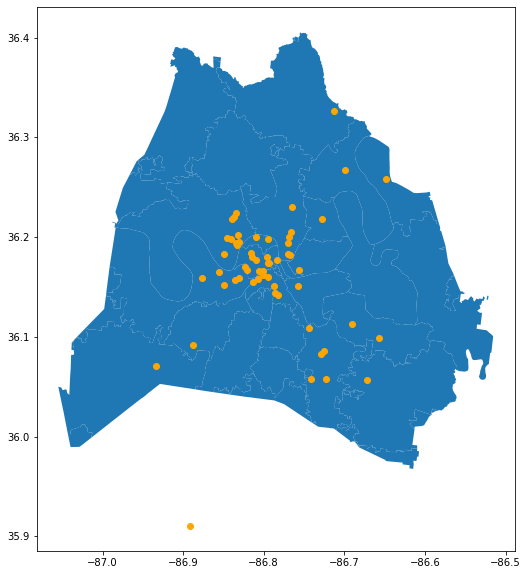

In [31]:
fig,ax=plt.subplots(figsize=(10,10))
ax=zipcodes.plot(ax=ax)
gdf.plot(ax=ax,color='orange')